In [1]:
#Modules for EDA
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

#Modules for ML(Recommendation)
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [2]:
df = pd.read_csv('top100_kdrama.csv')
df.shape

(100, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [4]:
synopsis = pd.read_csv('top100_kdrama.csv',usecols=['Synopsis'])
synopsis.head()

,Synopsis
0,Geu Roo is a young autistic man. He works for ...
1,The stories of people going through their days...
2,Although Baek Hee Sung is hiding a dark secret...
3,Park Dong Hoon is a middle-aged engineer who i...
4,"Kim Je Hyuk, a famous baseball player, is arre..."


In [5]:
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",#4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#5,9.1


# **Name as separate DataFrame**

In [6]:
kdrama_names = df[['Name']]
kdrama_names.head()

,Name
0,Move to Heaven
1,Hospital Playlist
2,Flower of Evil
3,My Mister
4,Prison Playbook


# **Features using for Recommendation**

In [7]:
cols_for_recommend = ['Year of release', 'Number of Episode', 'Network', 'Duration', 'Content Rating', 'Rating']
df = df[cols_for_recommend]
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),9.2
1,2020,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,9.1
2,2020,16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,9.1
3,2018,16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,9.1
4,2017,16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,15+ - Teens 15 or older,9.1


# **Feature Engineering**

# **Removing Duplicate values in Network column**

In [8]:
print(df['Network'][1])
print(df['Network'][1].replace(' ', '').split(','))
print(df['Network'][1].replace(' ', '').split(',')[0])      

tvN,  Netflix,  Netflix,  Netflix,  Netflix 
['tvN', 'Netflix', 'Netflix', 'Netflix', 'Netflix']
tvN


In [9]:
networks = []
[networks.append(list(set(network.replace(' ','').split(',')))[0]) for network in df['Network']]
networks[:5]

['Netflix', 'tvN', 'tvN', 'tvN', 'tvN']

In [10]:
df['Network'] = networks
df['Network'].unique()

array(['Netflix', 'tvN', 'jTBC', 'KBS2', 'OCN', 'SBS', 'MBC'],
      dtype=object)

In [11]:
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52 min.,18+ Restricted (violence & profanity),9.2
1,2020,12,tvN,1 hr. 30 min.,15+ - Teens 15 or older,9.1
2,2020,16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,9.1
3,2018,16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,9.1
4,2017,16,tvN,1 hr. 32 min.,15+ - Teens 15 or older,9.1


# **Network and Total KDramas**

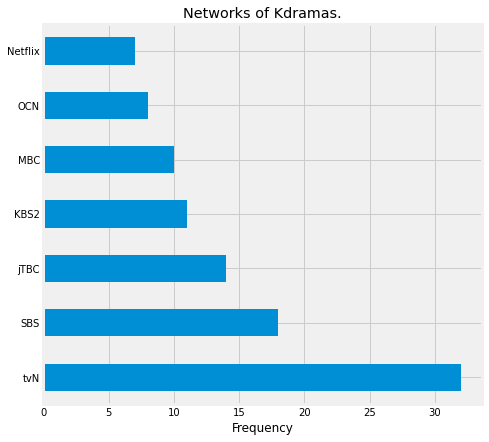

In [12]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.show()

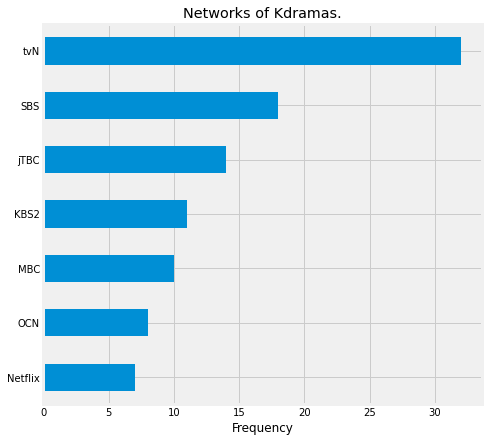

tvN        32
SBS        18
jTBC       14
KBS2       11
MBC        10
OCN         8
Netflix     7
Name: Network, dtype: int64

In [13]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis() # y축을 뒤집는 함수. 내림차순으로 정렬
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.show()

df['Network'].value_counts()

# **Setting OCN and ViKi networks to others because of less count**

In [14]:
df['Network'].replace(['OCN','Viki'],['Others','Others'],inplace=True)

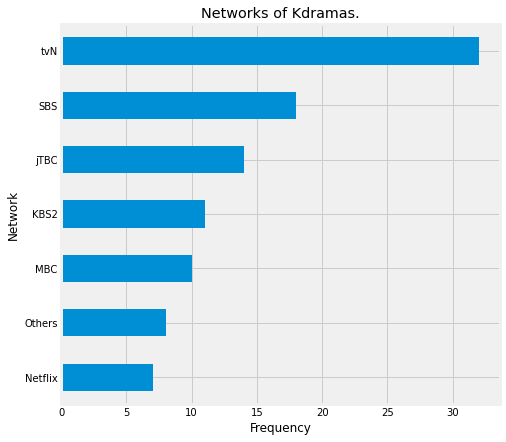

tvN        32
SBS        18
jTBC       14
KBS2       11
MBC        10
Others      8
Netflix     7
Name: Network, dtype: int64

In [15]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.ylabel('Network')
plt.show()

df['Network'].value_counts()

# **Duration in Minutes**

In [16]:
df['Duration'] = df['Duration'].str.replace('[A-Za-z]\D+','',regex=True)
df['Duration'].head()

0      52 
1    1 30 
2    1 10 
3    1 17 
4    1 32 
Name: Duration, dtype: object

In [17]:
df['Duration'] = df['Duration'].str.replace(' ','',regex=True)
df['Duration'].head()

0     52
1    130
2    110
3    117
4    132
Name: Duration, dtype: object

In [18]:
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'].head()

0     52
1    130
2    110
3    117
4    132
Name: Duration, dtype: int64

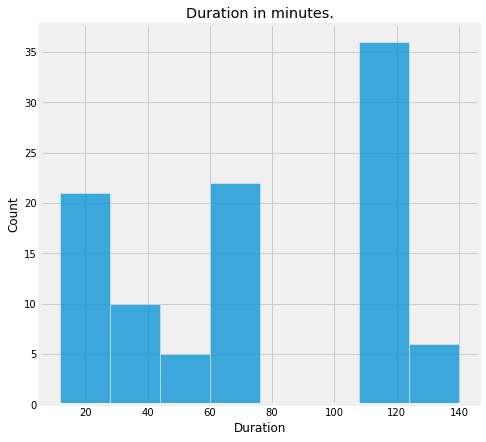

In [19]:
plt.figure(figsize=(7,7))
sns.histplot(data=df['Duration'])
plt.title('Duration in minutes.')
plt.show()

In [20]:
df[(df.Duration > 60) & (df.Duration < 110)]

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating


# **Content Rating**

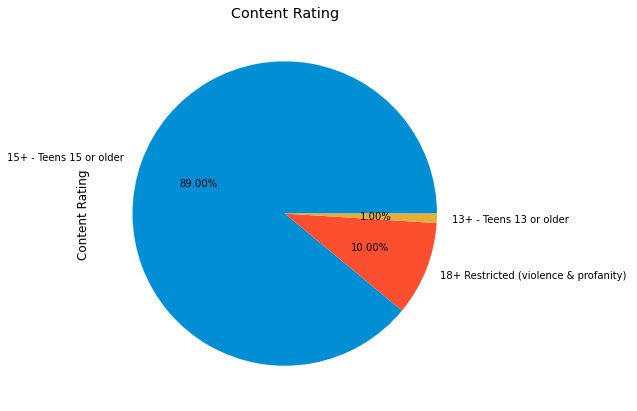

In [21]:
plt.figure(figsize=(7,7))
df['Content Rating'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Content Rating")
plt.show()

In [22]:
df['Content Rating'].value_counts()

15+ - Teens 15 or older                   89
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    1
Name: Content Rating, dtype: int64

# **Rating and Content Rating**

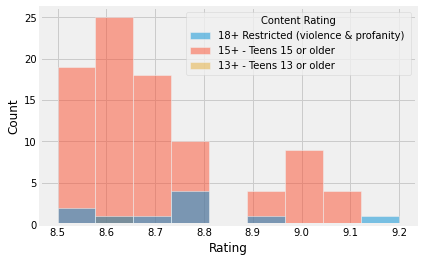

In [23]:
sns.histplot(data=df[['Rating','Content Rating']],x='Rating',hue='Content Rating')
plt.show()

In [24]:
df[['Rating']].describe()

,Rating
count,100.000000
mean,8.703000
std,0.178351
min,8.500000
25%,8.600000
50%,8.700000
75%,8.800000
max,9.200000


# **One Hot Encoding**

In [25]:
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52,18+ Restricted (violence & profanity),9.2
1,2020,12,tvN,130,15+ - Teens 15 or older,9.1
2,2020,16,tvN,110,15+ - Teens 15 or older,9.1
3,2018,16,tvN,117,15+ - Teens 15 or older,9.1
4,2017,16,tvN,132,15+ - Teens 15 or older,9.1


In [26]:
cols_to_encode = ['Network','Content Rating']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.head()

,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,1,0


In [27]:
df.drop(cols_to_encode, axis=1,inplace=True)
df.head()

,Year of release,Number of Episode,Duration,Rating
0,2021,10,52,9.2
1,2020,12,130,9.1
2,2020,16,110,9.1
3,2018,16,117,9.1
4,2017,16,132,9.1


# **Feature Scaling**

In [28]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)

In [29]:
i=0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [30]:
df.head()

,Year of release,Number of Episode,Duration,Rating
0,1.000000,0.042553,0.312500,1.000000
1,0.944444,0.063830,0.921875,0.857143
2,0.944444,0.106383,0.765625,0.857143
3,0.833333,0.106383,0.820312,0.857143
4,0.777778,0.106383,0.937500,0.857143


In [31]:
new_df = pd.concat([df, dummies],axis=1)
new_df.shape

(100, 12)

In [32]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
1,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
2,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
3,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0
4,0.777778,0.106383,0.937500,0.857143,0,0,0,0,0,1,1,0


In [33]:
kdrama_names['Name']

0           Move to Heaven
1        Hospital Playlist
2           Flower of Evil
3                My Mister
4          Prison Playbook
              ...         
95    Thirty But Seventeen
96                Vagabond
97         Be Melodramatic
98      Mad for Each Other
99      The Princess's Man
Name: Name, Length: 100, dtype: object

In [34]:
kdrama_names['Name'].loc[23]

'Kingdom'

In [35]:
kdrama_names[kdrama_names['Name'] == 'Kingdom']

,Name
14,Kingdom
23,Kingdom


In [36]:
kdrama_names['Name'].loc[23]='kingdom'

In [37]:
new_df.index = [drama for drama in kdrama_names['Name']]
synopsis.index = [drama for drama in kdrama_names['Name']]

In [38]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
Move to Heaven,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
Hospital Playlist,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
Flower of Evil,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
My Mister,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0
Prison Playbook,0.777778,0.106383,0.937500,0.857143,0,0,0,0,0,1,1,0


In [39]:
def getRecommendation_dramas_for(drama_name,no_of_recommend=5,get_similarity_rate=False):
    
    kn = NearestNeighbors(n_neighbors=no_of_recommend+1,metric='manhattan')
    kn.fit(new_df)
    
    distances, indices = kn.kneighbors(new_df.loc[drama_name])
    
    nearest_dramas = [kdrama_names.loc[i][0] for i in indices.flatten()][1:]
    if not get_similarity_rate:
        return nearest_dramas
    sim_rates = []
    synopsis_ = []
    for drama in nearest_dramas:
        synopsis_.append(synopsis.loc[drama][0])
        sim = cosine_similarity(new_df.loc[drama_name],[new_df.loc[drama]]).flatten()
        sim_rates.append(sim[0])
    recommended_dramas = pd.DataFrame({'Recommended Drama':nearest_dramas,'Similarity':sim_rates,'Synopsis':synopsis_})
    recommended_dramas.sort_values(by='Similarity',ascending=True)
    print(f'Similar K-Dramas for "{drama_name[0]}":')
    return recommended_dramas

In [40]:
drama_name, no_of_recommend, get_similarity_rate = kdrama_names.loc[0], 5, True
kdrama_names.loc[0]

Name    Move to Heaven
Name: 0, dtype: object

In [41]:
kn = NearestNeighbors(n_neighbors=no_of_recommend+1,metric='manhattan')
kn.fit(new_df)

NearestNeighbors(metric='manhattan', n_neighbors=6)

In [42]:
distances, indices = kn.kneighbors(new_df.loc[drama_name])
distances, indices

(array([[0.        , 0.58136768, 0.62698413, 0.73290537, 1.11805556,
         2.92432086]]),
 array([[ 0, 14, 25, 23, 83, 29]], dtype=int64))

In [43]:
indices.flatten()

array([ 0, 14, 25, 23, 83, 29], dtype=int64)

In [44]:
nearest_dramas = [kdrama_names.loc[i][0] for i in indices.flatten()][1:]
nearest_dramas

['Kingdom', 'Sweet Home', 'kingdom', 'Extracurricular', 'Taxi Driver']

In [45]:
cosine_similarity(new_df.loc[drama_name],[new_df.loc[nearest_dramas[1]]]).flatten()

array([0.9624909])

In [46]:
sim_rates = []
synopsis_ = []
for drama in nearest_dramas:
    synopsis_.append(synopsis.loc[drama][0]) 
    sim = cosine_similarity(new_df.loc[drama_name],[new_df.loc[drama]]).flatten()
    sim_rates.append(sim[0])
recommended_dramas = pd.DataFrame({'Recommended Drama':nearest_dramas,'Similarity':sim_rates,'Synopsis':synopsis_})
recommended_dramas.sort_values(by='Similarity',ascending=True)

,Recommended Drama,Similarity,Synopsis
4,Taxi Driver,0.674263,Do Gi has lived more honestly than anyone else...
3,Extracurricular,0.868578,"""Extracurricular” is centered around four high..."
1,Sweet Home,0.962491,Following the death of his family in an accide...
2,kingdom,0.962499,"Set in the Joseon Era, no sooner does the King..."
0,Kingdom,0.980038,"Following the events in season one, waves of t..."


# **Predicting Drama Recommendation**

In [47]:
rd1 = kdrama_names.loc[0]
rd1

Name    Move to Heaven
Name: 0, dtype: object

In [48]:
getRecommendation_dramas_for(rd1,no_of_recommend=5, get_similarity_rate = True)

Similar K-Dramas for "Move to Heaven":


,Recommended Drama,Similarity,Synopsis
0,Kingdom,0.980038,"Following the events in season one, waves of t..."
1,Sweet Home,0.962491,Following the death of his family in an accide...
2,kingdom,0.962499,"Set in the Joseon Era, no sooner does the King..."
3,Extracurricular,0.868578,"""Extracurricular” is centered around four high..."
4,Taxi Driver,0.674263,Do Gi has lived more honestly than anyone else...


In [49]:
rd2 = kdrama_names.loc[10]
rd2

Name    Mother
Name: 10, dtype: object

In [50]:
getRecommendation_dramas_for(rd2,get_similarity_rate=True)

Similar K-Dramas for "Mother":


,Recommended Drama,Similarity,Synopsis
0,Navillera,0.996550,A 70-year-old with a dream and a 23-year-old w...
1,Stranger 2,0.945869,The prosecutor's office and the police find th...
2,What's Wrong with Secretary Kim,0.916882,The series revolves around the narcissistic Le...
3,Signal,0.908419,"Fifteen years ago, a young girl was kidnapped ..."
4,It's Okay to Not Be Okay,0.917246,Moon Gang Tae is a community health worker at ...


In [51]:
rd3 = kdrama_names.loc[1]
rd3

Name    Hospital Playlist
Name: 1, dtype: object

In [52]:
getRecommendation_dramas_for(rd3,get_similarity_rate=True)

Similar K-Dramas for "Hospital Playlist":


,Recommended Drama,Similarity,Synopsis
0,Flower of Evil,0.997420,Although Baek Hee Sung is hiding a dark secret...
1,Prison Playbook,0.996988,"Kim Je Hyuk, a famous baseball player, is arre..."
2,My Mister,0.998064,Park Dong Hoon is a middle-aged engineer who i...
3,Crash Landing on You,0.997901,"After getting into a paragliding accident, Sou..."
4,It's Okay to Not Be Okay,0.996995,Moon Gang Tae is a community health worker at ...


In [53]:
def print_similiar_drama_Synopsis(recommended_df):
    rdf = recommended_df
    rdf_cols = rdf['Synopsis']
    dramas = rdf['Recommended Drama']
    for i in range(5):
        print(dramas[i])
        print(rdf_cols[i])
        print('\n')

In [54]:
rd4 = kdrama_names.loc[8]
rd4

Name    Navillera
Name: 8, dtype: object

In [55]:
rdf4 = getRecommendation_dramas_for(rd4,no_of_recommend=10,get_similarity_rate=True)
print_similiar_drama_Synopsis(rdf4)

Similar K-Dramas for "Navillera":
Mother
Realizing one of her students is being abused, school teacher and bird researcher Soo Jin impulsively kidnaps the girl and acts as a substitute mother in an attempt to take care of her.


Stranger 2
The prosecutor's office and the police find themselves on opposing sides. The prosecutors, including elite prosecutor Woo Tae Ha, want discretionary power over investigations. Meanwhile, the police, including Choi Bit, tries to get complete investigative authority that is independent of the prosecutor's office.


It's Okay to Not Be Okay
Moon Gang Tae is a community health worker at a psychiatric ward who was blessed with everything including a great body, smarts, ability to sympathize with others, patience, ability to react quickly, stamina, and more. Meanwhile, Ko Moon Young is a popular writer of children’s literature who, due to suffering from an antisocial personality disorder, seems extremely selfish, arrogant, and rude.


Vincenzo
At the age o

In [56]:
rd5 = kdrama_names.loc[99]
rd5

Name    The Princess's Man
Name: 99, dtype: object

In [57]:
getRecommendation_dramas_for(rd5,no_of_recommend=5,get_similarity_rate=True)

Similar K-Dramas for "The Princess's Man":


,Recommended Drama,Similarity,Synopsis
0,The Bridal Mask,0.990743,Lee Kang To is an ambitious and callous Korean...
1,Fight For My Way,0.933451,Can you still go after your dreams without the...
2,When the Camellia Blooms,0.945622,Dong Baek is a single mother living in the sma...
3,My Father is Strange,0.948805,This drama is about a family that lives on the...
4,Good Manager,0.930736,Can corporate politics turn a bad person into ...


### **Similarly I have done Android App Recommendation and Amazon Book Recommendation**
### **If you're interested then click on below links:**
1. **<a href="https://www.kaggle.com/nandalald/android-app-recommendation/">Android App Recommendation</a>**
2. **<a href="https://www.kaggle.com/nandalald/amazon-books-eda-recommendation">Amazon Book Recommendation</a>**